# Credit Card Fraud Analysis

### An analysis of fraudluent credit transactions and utilization for predictive modeling
### Project 1 - ITSC 3162

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Data Pre-Processing

### Below is the primary dataset for Fraudulent Transactions

In [3]:
# Loading the data
## Takes a LONG time to run -- approx 19 seconds for 2GB dataset 
cc_ibm_data = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 1 - Credit Card Fraud/credit_data/credit_card_transactions-ibm_v2.csv')


In [15]:
cc_ibm_data.head()
cc_ibm_data.describe()


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


In [17]:
cc_ibm_data.shape

(24386900, 15)

### Below are additional datasets with disticnt details on the cards themselves, and cardholder demographics
### (may or may not be used in modeling)

In [4]:
sd_card_data = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 1 - Credit Card Fraud/credit_data/sd254_cards.csv')
sd_user_data = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 1 - Credit Card Fraud/credit_data/sd254_users.csv')
user0_cc_data = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 1 - Credit Card Fraud/credit_data/User0_credit_card_transactions.csv')

In [20]:
## This dataset provides distinct information on the cards themselves 
sd_card_data.head()


,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [21]:
sd_user_data.shape

(2000, 18)

In [6]:
# This dataset provides distinct demographic information on the cardholders/users
sd_user_data.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


In [23]:
sd_user_data.shape

(2000, 18)

In [25]:
sd_user_data.isnull()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [26]:
## User and Card dataset can be joined with one another



## Data Exploration/Visualization

In [28]:
cc_ibm_data.dtypes

User                int64
Card                int64
Year                int64
Month               int64
Day                 int64
Time               object
Amount             object
Use Chip           object
Merchant Name       int64
Merchant City      object
Merchant State     object
Zip               float64
MCC                 int64
Errors?            object
Is Fraud?          object
dtype: object

### Which features do you think will be most useful for predicting/classifying the target value?
### Fraud vs No Fraud


In [29]:
cc_ibm_data['Is Fraud?'].value_counts()

No     24357143
Yes       29757
Name: Is Fraud?, dtype: int64

In [33]:
sns.countplot

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

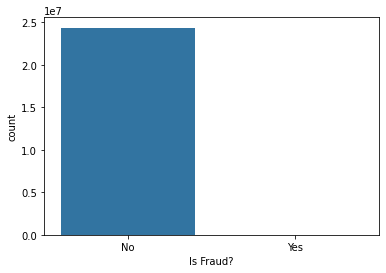

In [36]:
ax = sns.countplot( x= 'Is Fraud?', data = cc_ibm_data)

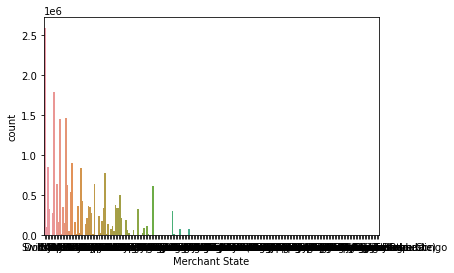

In [37]:
ax = sns.countplot( x= 'Merchant State', data = cc_ibm_data)

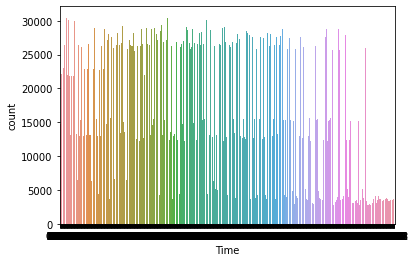

In [38]:
ax = sns.countplot( x= 'Time', data = cc_ibm_data)